In [1]:
%reset
import numpy as np
from landlab import RasterModelGrid
from landlab.components import StreamPowerEroder, FlowRouter, LinearDiffuser, PerronNLDiffuse, FastscapeEroder
from landlab.components import ChiFinder, SteepnessFinder
from landlab.plot import channel_profile as prf
from landlab import imshow_grid
from matplotlib import pyplot as plt
from landlab.io import write_esri_ascii
%matplotlib inline 

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
filenameHeader = "BlockUplift_10Myr_200yrTimeStep_onemmyr"

rowsNum = 250 # number of raster cells in vertical direction (y)
colsNum = 500 # number of raster cells in horizontal direction (x)
dxy  = 30 # side length of a raster model cell, or resolution [m]

lengthKm = (dxy * rowsNum)/1000
widthKm = (dxy * colsNum)/1000

# Below is a raster (square cells) grid, with equal width and height 
mg = RasterModelGrid((rowsNum,colsNum), dxy)

# Set boundary conditions - only the south side of the grid is open.
# Boolean parameters are sent to function in order of
# east, north, west, south.
mg.set_closed_boundaries_at_grid_edges(True, True, True, False)

In [3]:
# Code Block 3

np.random.seed(35) # seed set to zero so our figures are reproducible
mg_noise = np.random.rand(mg.number_of_nodes)/1000. # intial noise on elevation grid

# set up the elevation on the grid
zr = mg.add_zeros('node', 'topographic__elevation')
zr += mg_noise


In [4]:
totalTime = 10E6  # time for the model to run [yr] (Original value was 5E5 yr)
dt = 200 # time step [yr] (Original value was 5000 yr)
initialTime = 0 # amount of time the landscape has evolved [yr]
timeSteps = int(totalTime // dt) # number of time steps


In [5]:
#Define stream power components

K_sp = 1E-5 #Stream power pre-factor
m_sp = 0.5 #Drainage area exponent
n_sp = 1.0 #Slope exponent
k_d = .01 #Diffusion constant

frr = FlowRouter(mg,method='D8') # intializing flow routing
spr = StreamPowerEroder(mg, K_sp=K_sp, m_sp=m_sp, n_sp=n_sp, threshold_sp=0,
                        use_Q=None) #initializing stream power incision


lin_diffuse = LinearDiffuser(mg, linear_diffusivity=k_d )
#PerronNLDiffuse(mg, nonlinear_diffusivity=None, S_crit=20.*np.pi/180., rock_density=2700., sed_density=2700.)


In [6]:
#  uplift_rate [m/yr] (Original value is 0.0001 m/yr)
loweruplift_rate = np.ones(mg.number_of_nodes)*0.0005 
higheruplift_rate = np.ones(mg.number_of_nodes)*0.001

('Completed loop ', 0, ' out of ', 50000)
('Completed loop ', 20, ' out of ', 50000)
('Completed loop ', 40, ' out of ', 50000)
('Completed loop ', 60, ' out of ', 50000)
('Completed loop ', 80, ' out of ', 50000)
('Completed loop ', 100, ' out of ', 50000)
('Completed loop ', 120, ' out of ', 50000)
('Completed loop ', 140, ' out of ', 50000)
('Completed loop ', 160, ' out of ', 50000)
('Completed loop ', 180, ' out of ', 50000)
('Completed loop ', 200, ' out of ', 50000)
('Completed loop ', 220, ' out of ', 50000)
('Completed loop ', 240, ' out of ', 50000)
('Completed loop ', 260, ' out of ', 50000)
('Completed loop ', 280, ' out of ', 50000)
('Completed loop ', 300, ' out of ', 50000)
('Completed loop ', 320, ' out of ', 50000)
('Completed loop ', 340, ' out of ', 50000)
('Completed loop ', 360, ' out of ', 50000)
('Completed loop ', 380, ' out of ', 50000)
('Completed loop ', 400, ' out of ', 50000)
('Completed loop ', 420, ' out of ', 50000)
('Completed loop ', 440, ' out of ', 5

('Completed loop ', 3680, ' out of ', 50000)
('Completed loop ', 3700, ' out of ', 50000)
('Completed loop ', 3720, ' out of ', 50000)
('Completed loop ', 3740, ' out of ', 50000)
('Completed loop ', 3760, ' out of ', 50000)
('Completed loop ', 3780, ' out of ', 50000)
('Completed loop ', 3800, ' out of ', 50000)
('Completed loop ', 3820, ' out of ', 50000)
('Completed loop ', 3840, ' out of ', 50000)
('Completed loop ', 3860, ' out of ', 50000)
('Completed loop ', 3880, ' out of ', 50000)
('Completed loop ', 3900, ' out of ', 50000)
('Completed loop ', 3920, ' out of ', 50000)
('Completed loop ', 3940, ' out of ', 50000)
('Completed loop ', 3960, ' out of ', 50000)
('Completed loop ', 3980, ' out of ', 50000)
('Completed loop ', 4000, ' out of ', 50000)
('Completed loop ', 4020, ' out of ', 50000)
('Completed loop ', 4040, ' out of ', 50000)
('Completed loop ', 4060, ' out of ', 50000)
('Completed loop ', 4080, ' out of ', 50000)
('Completed loop ', 4100, ' out of ', 50000)
('Complete

('Completed loop ', 7340, ' out of ', 50000)
('Completed loop ', 7360, ' out of ', 50000)
('Completed loop ', 7380, ' out of ', 50000)
('Completed loop ', 7400, ' out of ', 50000)
('Completed loop ', 7420, ' out of ', 50000)
('Completed loop ', 7440, ' out of ', 50000)
('Completed loop ', 7460, ' out of ', 50000)
('Completed loop ', 7480, ' out of ', 50000)
('Completed loop ', 7500, ' out of ', 50000)
('Completed loop ', 7520, ' out of ', 50000)
('Completed loop ', 7540, ' out of ', 50000)
('Completed loop ', 7560, ' out of ', 50000)
('Completed loop ', 7580, ' out of ', 50000)
('Completed loop ', 7600, ' out of ', 50000)
('Completed loop ', 7620, ' out of ', 50000)
('Completed loop ', 7640, ' out of ', 50000)
('Completed loop ', 7660, ' out of ', 50000)
('Completed loop ', 7680, ' out of ', 50000)
('Completed loop ', 7700, ' out of ', 50000)
('Completed loop ', 7720, ' out of ', 50000)
('Completed loop ', 7740, ' out of ', 50000)
('Completed loop ', 7760, ' out of ', 50000)
('Complete

('Completed loop ', 10960, ' out of ', 50000)
('Completed loop ', 10980, ' out of ', 50000)
('Completed loop ', 11000, ' out of ', 50000)
('Completed loop ', 11020, ' out of ', 50000)
('Completed loop ', 11040, ' out of ', 50000)
('Completed loop ', 11060, ' out of ', 50000)
('Completed loop ', 11080, ' out of ', 50000)
('Completed loop ', 11100, ' out of ', 50000)
('Completed loop ', 11120, ' out of ', 50000)
('Completed loop ', 11140, ' out of ', 50000)
('Completed loop ', 11160, ' out of ', 50000)
('Completed loop ', 11180, ' out of ', 50000)
('Completed loop ', 11200, ' out of ', 50000)
('Completed loop ', 11220, ' out of ', 50000)
('Completed loop ', 11240, ' out of ', 50000)
('Completed loop ', 11260, ' out of ', 50000)
('Completed loop ', 11280, ' out of ', 50000)
('Completed loop ', 11300, ' out of ', 50000)
('Completed loop ', 11320, ' out of ', 50000)
('Completed loop ', 11340, ' out of ', 50000)
('Completed loop ', 11360, ' out of ', 50000)
('Completed loop ', 11380, ' out o

('Completed loop ', 14540, ' out of ', 50000)
('Completed loop ', 14560, ' out of ', 50000)
('Completed loop ', 14580, ' out of ', 50000)
('Completed loop ', 14600, ' out of ', 50000)
('Completed loop ', 14620, ' out of ', 50000)
('Completed loop ', 14640, ' out of ', 50000)
('Completed loop ', 14660, ' out of ', 50000)
('Completed loop ', 14680, ' out of ', 50000)
('Completed loop ', 14700, ' out of ', 50000)
('Completed loop ', 14720, ' out of ', 50000)
('Completed loop ', 14740, ' out of ', 50000)
('Completed loop ', 14760, ' out of ', 50000)
('Completed loop ', 14780, ' out of ', 50000)
('Completed loop ', 14800, ' out of ', 50000)
('Completed loop ', 14820, ' out of ', 50000)
('Completed loop ', 14840, ' out of ', 50000)
('Completed loop ', 14860, ' out of ', 50000)
('Completed loop ', 14880, ' out of ', 50000)
('Completed loop ', 14900, ' out of ', 50000)
('Completed loop ', 14920, ' out of ', 50000)
('Completed loop ', 14940, ' out of ', 50000)
('Completed loop ', 14960, ' out o

('Completed loop ', 18120, ' out of ', 50000)
('Completed loop ', 18140, ' out of ', 50000)
('Completed loop ', 18160, ' out of ', 50000)
('Completed loop ', 18180, ' out of ', 50000)
('Completed loop ', 18200, ' out of ', 50000)
('Completed loop ', 18220, ' out of ', 50000)
('Completed loop ', 18240, ' out of ', 50000)
('Completed loop ', 18260, ' out of ', 50000)
('Completed loop ', 18280, ' out of ', 50000)
('Completed loop ', 18300, ' out of ', 50000)
('Completed loop ', 18320, ' out of ', 50000)
('Completed loop ', 18340, ' out of ', 50000)
('Completed loop ', 18360, ' out of ', 50000)
('Completed loop ', 18380, ' out of ', 50000)
('Completed loop ', 18400, ' out of ', 50000)
('Completed loop ', 18420, ' out of ', 50000)
('Completed loop ', 18440, ' out of ', 50000)
('Completed loop ', 18460, ' out of ', 50000)
('Completed loop ', 18480, ' out of ', 50000)
('Completed loop ', 18500, ' out of ', 50000)
('Completed loop ', 18520, ' out of ', 50000)
('Completed loop ', 18540, ' out o

('Completed loop ', 21700, ' out of ', 50000)
('Completed loop ', 21720, ' out of ', 50000)
('Completed loop ', 21740, ' out of ', 50000)
('Completed loop ', 21760, ' out of ', 50000)
('Completed loop ', 21780, ' out of ', 50000)
('Completed loop ', 21800, ' out of ', 50000)
('Completed loop ', 21820, ' out of ', 50000)
('Completed loop ', 21840, ' out of ', 50000)
('Completed loop ', 21860, ' out of ', 50000)
('Completed loop ', 21880, ' out of ', 50000)
('Completed loop ', 21900, ' out of ', 50000)
('Completed loop ', 21920, ' out of ', 50000)
('Completed loop ', 21940, ' out of ', 50000)
('Completed loop ', 21960, ' out of ', 50000)
('Completed loop ', 21980, ' out of ', 50000)
('Completed loop ', 22000, ' out of ', 50000)
('Completed loop ', 22020, ' out of ', 50000)
('Completed loop ', 22040, ' out of ', 50000)
('Completed loop ', 22060, ' out of ', 50000)
('Completed loop ', 22080, ' out of ', 50000)
('Completed loop ', 22100, ' out of ', 50000)
('Completed loop ', 22120, ' out o

('Completed loop ', 25280, ' out of ', 50000)
('Completed loop ', 25300, ' out of ', 50000)
('Completed loop ', 25320, ' out of ', 50000)
('Completed loop ', 25340, ' out of ', 50000)
('Completed loop ', 25360, ' out of ', 50000)
('Completed loop ', 25380, ' out of ', 50000)
('Completed loop ', 25400, ' out of ', 50000)
('Completed loop ', 25420, ' out of ', 50000)
('Completed loop ', 25440, ' out of ', 50000)
('Completed loop ', 25460, ' out of ', 50000)
('Completed loop ', 25480, ' out of ', 50000)
('Completed loop ', 25500, ' out of ', 50000)
('Completed loop ', 25520, ' out of ', 50000)
('Completed loop ', 25540, ' out of ', 50000)
('Completed loop ', 25560, ' out of ', 50000)
('Completed loop ', 25580, ' out of ', 50000)
('Completed loop ', 25600, ' out of ', 50000)
('Completed loop ', 25620, ' out of ', 50000)
('Completed loop ', 25640, ' out of ', 50000)
('Completed loop ', 25660, ' out of ', 50000)
('Completed loop ', 25680, ' out of ', 50000)
('Completed loop ', 25700, ' out o

('Completed loop ', 28860, ' out of ', 50000)
('Completed loop ', 28880, ' out of ', 50000)
('Completed loop ', 28900, ' out of ', 50000)
('Completed loop ', 28920, ' out of ', 50000)
('Completed loop ', 28940, ' out of ', 50000)
('Completed loop ', 28960, ' out of ', 50000)
('Completed loop ', 28980, ' out of ', 50000)
('Completed loop ', 29000, ' out of ', 50000)
('Completed loop ', 29020, ' out of ', 50000)
('Completed loop ', 29040, ' out of ', 50000)
('Completed loop ', 29060, ' out of ', 50000)
('Completed loop ', 29080, ' out of ', 50000)
('Completed loop ', 29100, ' out of ', 50000)
('Completed loop ', 29120, ' out of ', 50000)
('Completed loop ', 29140, ' out of ', 50000)
('Completed loop ', 29160, ' out of ', 50000)
('Completed loop ', 29180, ' out of ', 50000)
('Completed loop ', 29200, ' out of ', 50000)
('Completed loop ', 29220, ' out of ', 50000)
('Completed loop ', 29240, ' out of ', 50000)
('Completed loop ', 29260, ' out of ', 50000)
('Completed loop ', 29280, ' out o

('Completed loop ', 32440, ' out of ', 50000)
('Completed loop ', 32460, ' out of ', 50000)
('Completed loop ', 32480, ' out of ', 50000)
('Completed loop ', 32500, ' out of ', 50000)
('Completed loop ', 32520, ' out of ', 50000)
('Completed loop ', 32540, ' out of ', 50000)
('Completed loop ', 32560, ' out of ', 50000)
('Completed loop ', 32580, ' out of ', 50000)
('Completed loop ', 32600, ' out of ', 50000)
('Completed loop ', 32620, ' out of ', 50000)
('Completed loop ', 32640, ' out of ', 50000)
('Completed loop ', 32660, ' out of ', 50000)
('Completed loop ', 32680, ' out of ', 50000)
('Completed loop ', 32700, ' out of ', 50000)
('Completed loop ', 32720, ' out of ', 50000)
('Completed loop ', 32740, ' out of ', 50000)
('Completed loop ', 32760, ' out of ', 50000)
('Completed loop ', 32780, ' out of ', 50000)
('Completed loop ', 32800, ' out of ', 50000)
('Completed loop ', 32820, ' out of ', 50000)
('Completed loop ', 32840, ' out of ', 50000)
('Completed loop ', 32860, ' out o

('Completed loop ', 36020, ' out of ', 50000)
('Completed loop ', 36040, ' out of ', 50000)
('Completed loop ', 36060, ' out of ', 50000)
('Completed loop ', 36080, ' out of ', 50000)
('Completed loop ', 36100, ' out of ', 50000)
('Completed loop ', 36120, ' out of ', 50000)
('Completed loop ', 36140, ' out of ', 50000)
('Completed loop ', 36160, ' out of ', 50000)
('Completed loop ', 36180, ' out of ', 50000)
('Completed loop ', 36200, ' out of ', 50000)
('Completed loop ', 36220, ' out of ', 50000)
('Completed loop ', 36240, ' out of ', 50000)
('Completed loop ', 36260, ' out of ', 50000)
('Completed loop ', 36280, ' out of ', 50000)
('Completed loop ', 36300, ' out of ', 50000)
('Completed loop ', 36320, ' out of ', 50000)
('Completed loop ', 36340, ' out of ', 50000)
('Completed loop ', 36360, ' out of ', 50000)
('Completed loop ', 36380, ' out of ', 50000)
('Completed loop ', 36400, ' out of ', 50000)
('Completed loop ', 36420, ' out of ', 50000)
('Completed loop ', 36440, ' out o

('Completed loop ', 39600, ' out of ', 50000)
('Completed loop ', 39620, ' out of ', 50000)
('Completed loop ', 39640, ' out of ', 50000)
('Completed loop ', 39660, ' out of ', 50000)
('Completed loop ', 39680, ' out of ', 50000)
('Completed loop ', 39700, ' out of ', 50000)
('Completed loop ', 39720, ' out of ', 50000)
('Completed loop ', 39740, ' out of ', 50000)
('Completed loop ', 39760, ' out of ', 50000)
('Completed loop ', 39780, ' out of ', 50000)
('Completed loop ', 39800, ' out of ', 50000)
('Completed loop ', 39820, ' out of ', 50000)
('Completed loop ', 39840, ' out of ', 50000)
('Completed loop ', 39860, ' out of ', 50000)
('Completed loop ', 39880, ' out of ', 50000)
('Completed loop ', 39900, ' out of ', 50000)
('Completed loop ', 39920, ' out of ', 50000)
('Completed loop ', 39940, ' out of ', 50000)
('Completed loop ', 39960, ' out of ', 50000)
('Completed loop ', 39980, ' out of ', 50000)
('Completed loop ', 40000, ' out of ', 50000)
('Completed loop ', 40020, ' out o

('Completed loop ', 43180, ' out of ', 50000)
('Completed loop ', 43200, ' out of ', 50000)
('Completed loop ', 43220, ' out of ', 50000)
('Completed loop ', 43240, ' out of ', 50000)
('Completed loop ', 43260, ' out of ', 50000)
('Completed loop ', 43280, ' out of ', 50000)
('Completed loop ', 43300, ' out of ', 50000)
('Completed loop ', 43320, ' out of ', 50000)
('Completed loop ', 43340, ' out of ', 50000)
('Completed loop ', 43360, ' out of ', 50000)
('Completed loop ', 43380, ' out of ', 50000)
('Completed loop ', 43400, ' out of ', 50000)
('Completed loop ', 43420, ' out of ', 50000)
('Completed loop ', 43440, ' out of ', 50000)
('Completed loop ', 43460, ' out of ', 50000)
('Completed loop ', 43480, ' out of ', 50000)
('Completed loop ', 43500, ' out of ', 50000)
('Completed loop ', 43520, ' out of ', 50000)
('Completed loop ', 43540, ' out of ', 50000)
('Completed loop ', 43560, ' out of ', 50000)
('Completed loop ', 43580, ' out of ', 50000)
('Completed loop ', 43600, ' out o

('Completed loop ', 46760, ' out of ', 50000)
('Completed loop ', 46780, ' out of ', 50000)
('Completed loop ', 46800, ' out of ', 50000)
('Completed loop ', 46820, ' out of ', 50000)
('Completed loop ', 46840, ' out of ', 50000)
('Completed loop ', 46860, ' out of ', 50000)
('Completed loop ', 46880, ' out of ', 50000)
('Completed loop ', 46900, ' out of ', 50000)
('Completed loop ', 46920, ' out of ', 50000)
('Completed loop ', 46940, ' out of ', 50000)
('Completed loop ', 46960, ' out of ', 50000)
('Completed loop ', 46980, ' out of ', 50000)
('Completed loop ', 47000, ' out of ', 50000)
('Completed loop ', 47020, ' out of ', 50000)
('Completed loop ', 47040, ' out of ', 50000)
('Completed loop ', 47060, ' out of ', 50000)
('Completed loop ', 47080, ' out of ', 50000)
('Completed loop ', 47100, ' out of ', 50000)
('Completed loop ', 47120, ' out of ', 50000)
('Completed loop ', 47140, ' out of ', 50000)
('Completed loop ', 47160, ' out of ', 50000)
('Completed loop ', 47180, ' out o

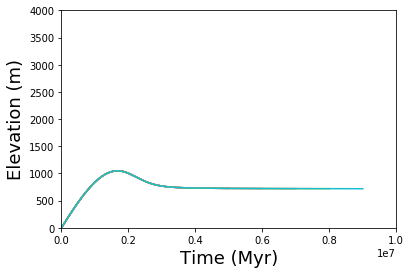

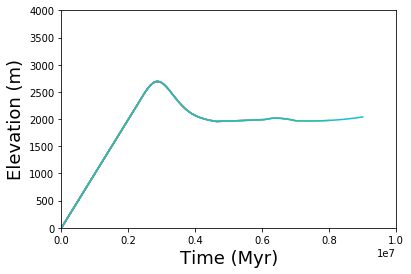

In [7]:
# Code Block 7
meanElevationArray = []
timeArray = []
maxElevationArray =[]

for i in range(timeSteps):
    #if i <= 35000:
        #zr[mg.core_nodes] += loweruplift_rate[mg.core_nodes]*dt # uplift the landscape
    #else:
    zr[mg.core_nodes] += higheruplift_rate[mg.core_nodes]*dt # uplift the landscape
    
    frr.run_one_step() # route flow
    spr.run_one_step(dt) # fluvial incision
    lin_diffuse.run_one_step(dt)
    initialTime += dt # update time keeper
    #print(total_time)
    meanElevation = np.mean(zr)
    maxElevation = np.max(zr)
    
    timeArray.append(i*dt)
    meanElevationArray.append(meanElevation)
    maxElevationArray.append(maxElevation)
    
    if i % 20 == 0:
      print ("Completed loop ", i, " out of ", timeSteps)
    
    if i %5000 ==0:
        plt.figure(3) 
        plt.clf
        plt.plot(timeArray, meanElevationArray)
        axes = plt.gca()
        axes.set_xlim([0,10000000])
        axes.set_ylim([0,4000])
        plt.xlabel('Time (Myr)', fontsize=18)
        plt.ylabel('Elevation (m)', fontsize=18)

        meanElevationFigName = filenameHeader + "meanElevation"+str(i)+".png"
        plt.savefig(meanElevationFigName)
        
        plt.figure(4)   
        plt.clf
        plt.plot(timeArray, maxElevationArray)
        axes = plt.gca()
        axes.set_xlim([0,10000000])
        axes.set_ylim([0,4000])
        plt.xlabel('Time (Myr)', fontsize=18)
        plt.ylabel('Elevation (m)', fontsize=18)

        maxElevationFigName = filenameHeader + "maxElevation"+str(i)+".png"
        plt.savefig(maxElevationFigName)
        
        filename = filenameHeader + "k_" + str(K_sp) + "_" + "m_" + str(m_sp) + "_" + "n_"+ str(n_sp) + "_" +\
        "LinDiffusion_" + str(k_d) + "_" + str(widthKm) + "x" + str(lengthKm)+ "km_" + "30mRes" + str(i)+".txt"

        write_esri_ascii(filename, mg, 'topographic__elevation')
        
    

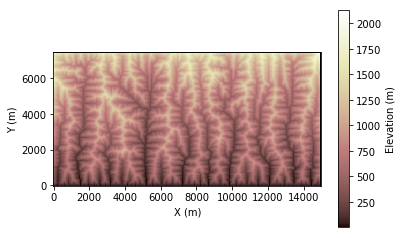

In [8]:
imshow_grid(mg, 'topographic__elevation', grid_units=('m', 'm'),
                var_name='Elevation (m)')


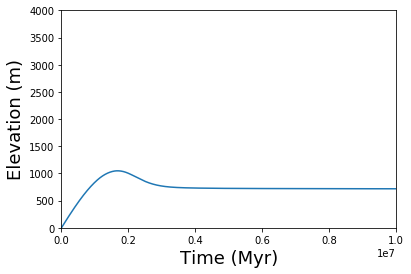

In [9]:
#Plot and save mean elevation through time

plt.figure(3)    
plt.plot(timeArray, meanElevationArray)
axes = plt.gca()
axes.set_xlim([0,10000000])
axes.set_ylim([0,4000])
plt.xlabel('Time (Myr)', fontsize=18)
plt.ylabel('Elevation (m)', fontsize=18)

meanElevationFigName = filenameHeader + "meanElevation.png"
plt.savefig(meanElevationFigName)

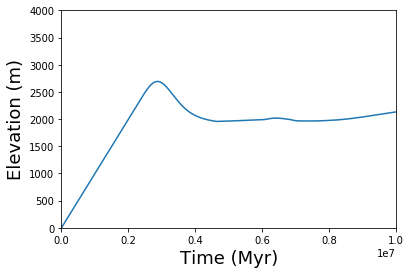

In [10]:
#Plot and save max elevation through time

plt.figure(3)    
plt.plot(timeArray, maxElevationArray)
axes = plt.gca()
axes.set_xlim([0,10000000])
axes.set_ylim([0,4000])
plt.xlabel('Time (Myr)', fontsize=18)
plt.ylabel('Elevation (m)', fontsize=18)

maxElevationFigName = filenameHeader + "maxElevation.png"
plt.savefig(maxElevationFigName)

In [11]:
#Write out Ascii file of elevation field

filename = filenameHeader + "k_" + str(K_sp) + "_" + "m_" + str(m_sp) + "_" + "n_"+ str(n_sp) + "_" +\
    "LinDiffusion_" + str(k_d) + "_" + str(widthKm) + "x" + str(lengthKm)+ "km_" + "30mRes" + ".txt"

write_esri_ascii(filename, mg, 'topographic__elevation')

['BlockUplift_10Myr_200yrTimeStep_onemmyrk_1e-05_m_0.5_n_1.0_LinDiffusion_0.01_15x7km_30mRes.txt']

In [12]:
#Write out text files for mean elevation, max elevation, and time

meanElevavationFilename = filenameHeader + "k_" + str(K_sp) + "_" + "m_" + str(m_sp) + "_" \
    + "n_"+ str(n_sp) + "_" + "LinDiffusion_" + str(k_d) + "_" + str(widthKm) \
    + "x" + str(lengthKm)+ "km_" + "30mRes" + "_meanElevation" + ".txt"

np.savetxt(meanElevavationFilename, meanElevationArray, delimiter=" ")


maxElevavationFilename = filenameHeader + "k_" + str(K_sp) + "_" + "m_" + str(m_sp) + "_" \
    + "n_"+ str(n_sp) + "_" + "LinDiffusion_" + str(k_d) + "_" + str(widthKm) \
    + "x" + str(lengthKm)+ "km_" + "30mRes" + "_maxElevation" + ".txt"

np.savetxt(maxElevavationFilename, maxElevationArray, delimiter=" ")


timeFilename = filenameHeader + "k_" + str(K_sp) + "_" + "m_" + str(m_sp) + "_" \
    + "n_"+ str(n_sp) + "_" + "LinDiffusion_" + str(k_d) + "_" + str(widthKm) \
    + "x" + str(lengthKm)+ "km_" + "30mRes" + "_timeMyr" + ".txt"

np.savetxt(timeFilename, timeArray, delimiter=" ")


